<a href="https://colab.research.google.com/github/vikramc24/Telecom-Churn-Analysis/blob/main/Vikram_EDA%2C_Telecom_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription


Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set()

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
df = pd.read_csv('/content/drive/MyDrive/Telecom Churn.csv')

In [12]:
# Upload the file 
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


# Understanding the Data 

In [13]:
# Check the first 10 raws of the data set.
df.head(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [14]:
# Check the last 10 raws of the data set.
df.tail(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3323,IN,117,415,No,No,0,118.4,126,20.13,249.3,97,21.19,227.0,56,10.22,13.6,3,3.67,5,True
3324,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False
3325,OH,78,408,No,No,0,193.4,99,32.88,116.9,88,9.94,243.3,109,10.95,9.3,4,2.51,2,False
3326,OH,96,415,No,No,0,106.6,128,18.12,284.8,87,24.21,178.9,92,8.05,14.9,7,4.02,1,False
3327,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [15]:
# Find shape of our dataset 
df.shape

(3333, 20)

In [16]:
# Another way to get the shape
print('NUMBER OF RAWS', df.shape[0])
print('NUMBER OF COLUMNS', df.shape[1])

NUMBER OF RAWS 3333
NUMBER OF COLUMNS 20


In [17]:
# Getting the information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [18]:
# Access the columns 
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

# Explain the Variables about the Data set
1. **State**: State in which the customer resides.
2. **Account Length** : the number of days that this account has been active.
3. **Area Code**: Area code of the corresponding customer’s phone number.
4. **International plan**: The customer has an international calling plan or not.
5. **Voice mail plan**: The customer has a voice mail feature or not.
6. **Number vmail messages**: Number of voice mail messages of the customer.
7. **Total day minutes**: Total call minutes during the day.
8. **Total day calls**: Total number of calls during the day.
9. **Total day charges**: The billed amount of the day calls.
10.**Total eve minutes**: Total call minutes during the evening.
11.**Total eve calls**: Total number of calls during the evening.
12.**Total eve charges**: The billed amount of the evening calls.
13.**Total night minutes**: Total call minutes during the night.
14.**Total night calls**: Total number of calls during the night.
15.**Total night charges**: The billed amount of the night calls.
16.**Total intl minutes**: The Total number of international minutes.
17.**Total intl calls**: The Total number of international calls.
18.**Total intl charge**: The billed amount for international calls.
19.**Customer service calls**: Number of service calls made by customers.
20.**Churn**: Customer churn - True indicates customer churned, False indicates customer is retained.

In [19]:
# Data types of all the columns 
df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [20]:
# checking the unique value in the data set
df.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

In [21]:
# getting the discription of the data set
df.describe(include='all')
# it include the variables which are of object data type

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333,3333.000000,3333.000000,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,106,NaN,NaN,3010,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,437.182418,NaN,NaN,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.822106,42.371290,NaN,NaN,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,408.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,408.000000,NaN,NaN,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,415.000000,NaN,NaN,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,510.000000,NaN,NaN,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


In [22]:
df.describe()
# It does not include the variables having object data types 

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [23]:
df.describe(include='all').T
# It changes the place of rows and columns 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
State,3333,51,WV,106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Account length,3333.0,NaN,NaN,NaN,101.064806,39.822106,1.0,74.0,101.0,127.0,243.0
Area code,3333.0,NaN,NaN,NaN,437.182418,42.37129,408.0,408.0,415.0,510.0,510.0
International plan,3333,2,No,3010,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Voice mail plan,3333,2,No,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number vmail messages,3333.0,NaN,NaN,NaN,8.09901,13.688365,0.0,0.0,0.0,20.0,51.0
Total day minutes,3333.0,NaN,NaN,NaN,179.775098,54.467389,0.0,143.7,179.4,216.4,350.8
Total day calls,3333.0,NaN,NaN,NaN,100.435644,20.069084,0.0,87.0,101.0,114.0,165.0
Total day charge,3333.0,NaN,NaN,NaN,30.562307,9.259435,0.0,24.43,30.5,36.79,59.64
Total eve minutes,3333.0,NaN,NaN,NaN,200.980348,50.713844,0.0,166.6,201.4,235.3,363.7


In [24]:
# getting the null values in the data set
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

###### As per the above data we get 3333 rows and 20 columns in which 
* 3 having object data type 
* 8 having integer data type 
* 8 having float data type 
* 1 having bool datab type 
 

# Exploratory Data Analysis Of The Data Set.

#### As per the data set analysing the churning rate of the customers 


In [25]:
# Getting uinque value inside the churn
df['Churn'].unique()

array([False,  True])

In [26]:
# Count the values inside the churn
print(df.Churn.value_counts())

False    2850
True      483
Name: Churn, dtype: int64


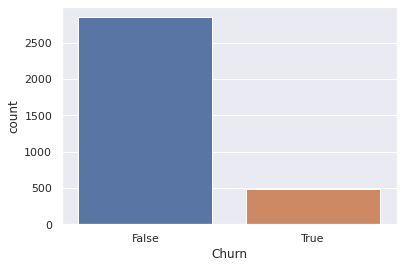

In [27]:
# Graphical presentation of churn Values 
sns.countplot(x=df.Churn)

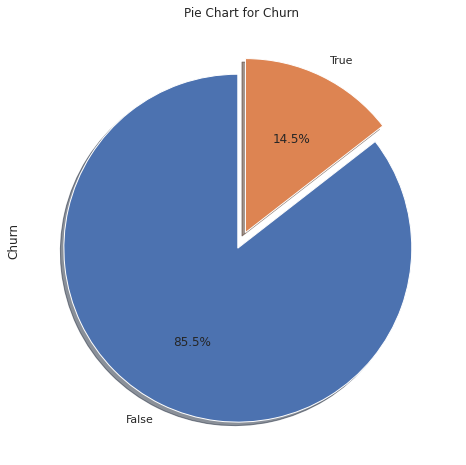

In [28]:
# Getting the percentage of the "Churn" values with the help of pie chart
df ['Churn'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',  startangle=90,shadow=True, figsize=(8,8))
plt.title('Pie Chart for Churn')
plt.show()

#### Findings

* As per the analysis of the "Churn" variable we get that approx. 15% of the total customer left the operator 


## Analysis of States

In [29]:
# Finding the unique value in States
df['State'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [ ]:
# Finding the number of uniques in States
df['State'].nunique()

51

##### Comparision between State and Churn

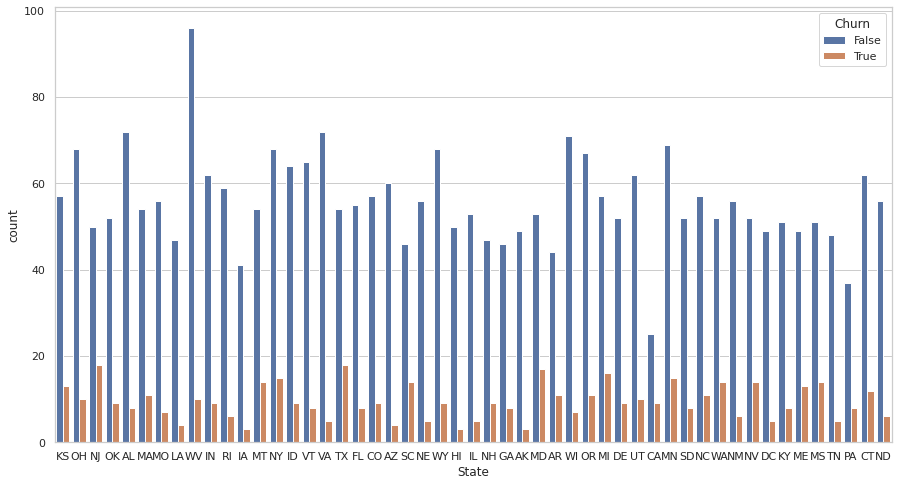

In [30]:
# Comparision of states with churn by using countplot 
sns.set(style="whitegrid")
plt.figure(figsize=(15,8))
ax = sns.countplot(x='State', hue="Churn", data=df)
plt.show()

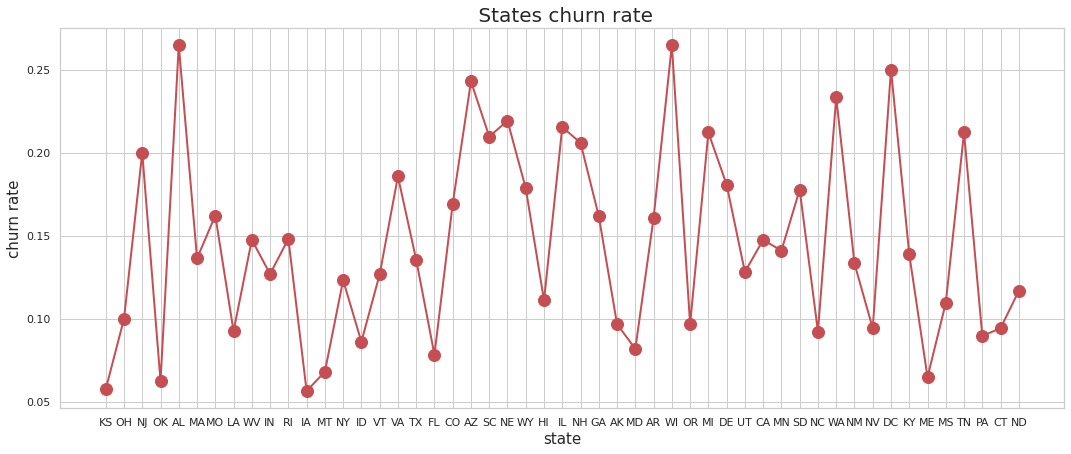

In [31]:
# Showing comparision by using another way
s1=df['State'].unique()
s2=df.groupby(['State'])['Churn'].mean()

plt.rcParams['figure.figsize'] = (18, 7)

plt.plot(s1,s2,color='r', marker='o', linewidth=2, markersize=12)

plt.title(" States churn rate", fontsize = 20)
plt.xlabel('state', fontsize = 15)
plt.ylabel('churn rate', fontsize = 15)
plt.show()

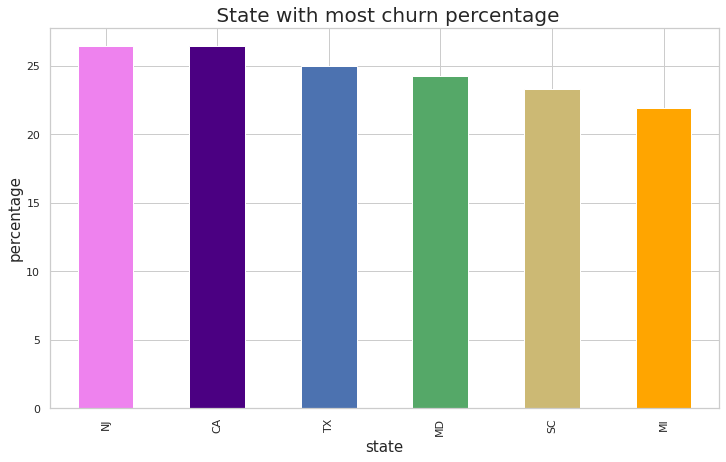

In [32]:
# States with highest churning percentage
plt.rcParams['figure.figsize'] = (12, 7)
color = plt.cm.copper(np.linspace(0, 0.5, 20))
((df.groupby(['State'])['Churn'].mean())*100).sort_values(ascending = False).head(6).plot.bar(color = ['violet','indigo','b','g','y','orange','r'])
plt.title(" State with most churn percentage", fontsize = 20)
plt.xlabel('state', fontsize = 15)
plt.ylabel('percentage', fontsize = 15)
plt.show()

#### Finding and Recommendation of State-Churn Comparison

1. As per the above data set, there are chustomer churn data from 51 states in which NJ, CA, TX, MD, SC, MI having the hightest customer churning rate i.e more than 21 and the maximum chrn from NJ where it is more than 25

2. Accoreding to this data we can say that there may be a weak network or less network coverage is responsible for the customer Churn


## Analysis of Account Length

In [33]:
# Finding churned and retained customer/not churned
df_churn = df[df["Churn"] == bool(True)]
df_not_churned = df[df["Churn"] == bool(False)]

In [34]:
# Cutomers who left the operator
df_churn

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
10,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
21,CO,77,408,No,No,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True
33,AZ,12,408,No,No,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,True
41,MD,135,408,Yes,Yes,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,CA,84,415,No,No,0,280.0,113,47.60,202.2,90,17.19,156.8,103,7.06,10.4,4,2.81,0,True
3304,IL,71,510,Yes,No,0,186.1,114,31.64,198.6,140,16.88,206.5,80,9.29,13.8,5,3.73,4,True
3320,GA,122,510,Yes,No,0,140.0,101,23.80,196.4,77,16.69,120.1,133,5.40,9.7,4,2.62,4,True
3322,MD,62,408,No,No,0,321.1,105,54.59,265.5,122,22.57,180.5,72,8.12,11.5,2,3.11,4,True


In [35]:
# Customer who are continuing the service with the operator
df_not_churned

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


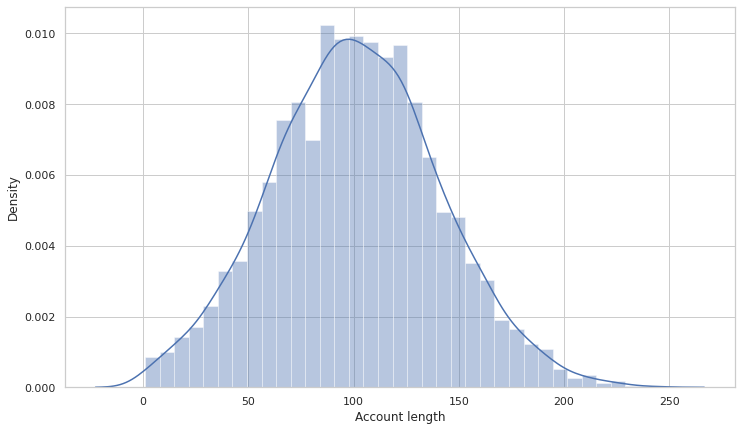

In [36]:
# Comparison of Churn with Account length using distplot
sns.distplot(df['Account length'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level f

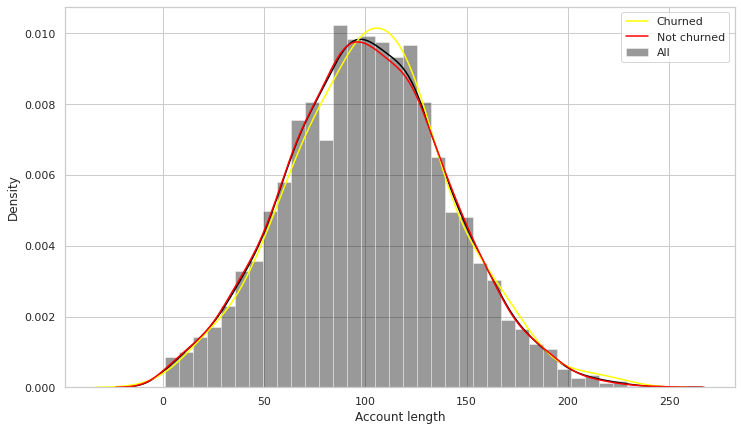

In [37]:
#comparison of churned account length and not churned account length 
sns.distplot(df['Account length'],color = 'black',label="All")
sns.distplot(df_churn['Account length'],color = "yellow",hist=False,label="Churned")
sns.distplot(df_not_churned['Account length'],color = 'red',hist= False,label="Not churned")
plt.legend()

#### Finding of Account length-Churn Comparison

As per the data there is no direct relation between "Account lenght" and "Churn" so there is no impact of account length on customer churning rate.

## Analysis of Area Code 

In [38]:
# Finding the unique value in Area code 
list(df['Area code'].unique())

[415, 408, 510]

In [39]:
# Finding the number of unique value in Area code 
df['Area code'].nunique()

3

In [40]:
# Comparison between Area Code and Churn
# Calculate the percentage between "Area code" and "Churn"
Area_code_data = pd.crosstab(df["Area code"],df["Churn"])
Area_code_data['Percentage_Churn'] = Area_code_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(Area_code_data)

Churn      False  True  Percentage_Churn
Area code                               
408          716   122         14.558473
415         1419   236         14.259819
510          715   125         14.880952


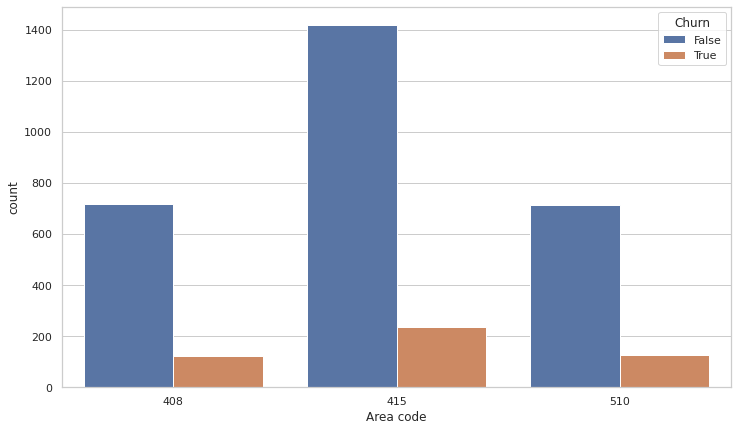

In [41]:
# Presentation of Area Code and Churn ratio using the countplot
sns.set(style="whitegrid")
ax = sns.countplot(x='Area code', hue="Churn", data=df)
plt.show()

#### Findings 

* According to the abve data there are only three area code i.e 408, 415, 510 and the churning rate in each area code is approx 15% in each code.

## Analysis of International Plans 

In [42]:
# Find the unique values in International Plans 
df["International plan"].unique()

array(['No', 'Yes'], dtype=object)

In [43]:
# Calculate the unique values in International Plans
df["International plan"].nunique()

2

In [44]:
# Count the values in International plans 
df['International plan'].value_counts()

No     3010
Yes     323
Name: International plan, dtype: int64

In [45]:
# Calculate the percentage and compare the International Plan and Churn
International_plan_data = pd.crosstab(df["International plan"],df["Churn"])
International_plan_data['Percentage Churn'] = International_plan_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(International_plan_data)

Churn               False  True  Percentage Churn
International plan                               
No                   2664   346         11.495017
Yes                   186   137         42.414861


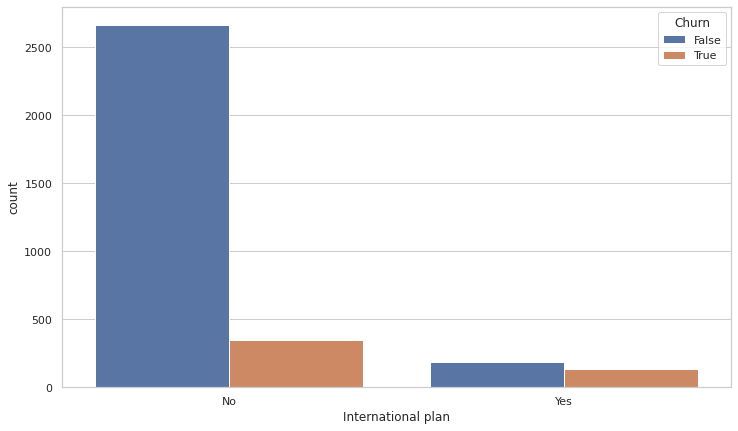

In [46]:
# Plot the values on graph using countplot
sns.countplot(x='International plan',hue="Churn",data = df)

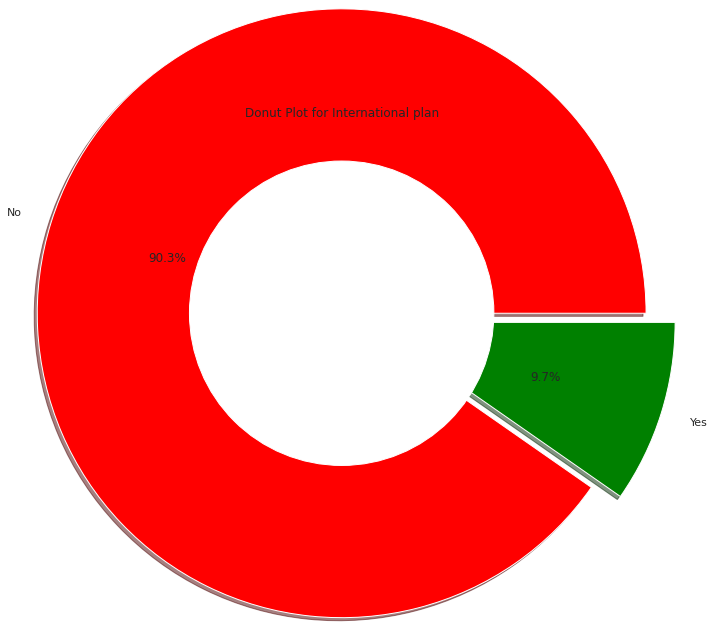

In [47]:
# Showing the percentage of customer churn who are using the international plan
data = df['International plan'].value_counts()
explode = (0, 0.2)
plt.pie(data, explode = explode,autopct='%1.1f%%',shadow=True,radius = 2.0, labels = ['No','Yes'],colors=['red' ,'green'])
circle = plt.Circle( (0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Donut Plot for International plan')
plt.show()

#### Findings

1. We get from the data set.
2. There are 3010 customers who dont have a international plan.
3. There are 323 customers who have a international plan.
4. Among those who have a international plan 42.4 % people churn.
5. Whereas among those who dont have a international plan only 11.4 % people churn.
6. So basically the people who bought International plans are churning in big numbers.
7. Probably romaing charges is higher in other states.
8. Probably because of connectivity issues or high call charge.

## Analysis of Voice Mail Plan


In [48]:
#show the unique value of the "Voice mail plan" column
df["Voice mail plan"].unique()

array(['Yes', 'No'], dtype=object)

In [49]:
#Calculate the Voice Mail Plan vs Churn percentage
Voice_mail_plan_data = pd.crosstab(df["Voice mail plan"],df["Churn"])
Voice_mail_plan_data['Percentage Churn'] = Voice_mail_plan_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(Voice_mail_plan_data)

Churn            False  True  Percentage Churn
Voice mail plan                               
No                2008   403         16.715056
Yes                842    80          8.676790


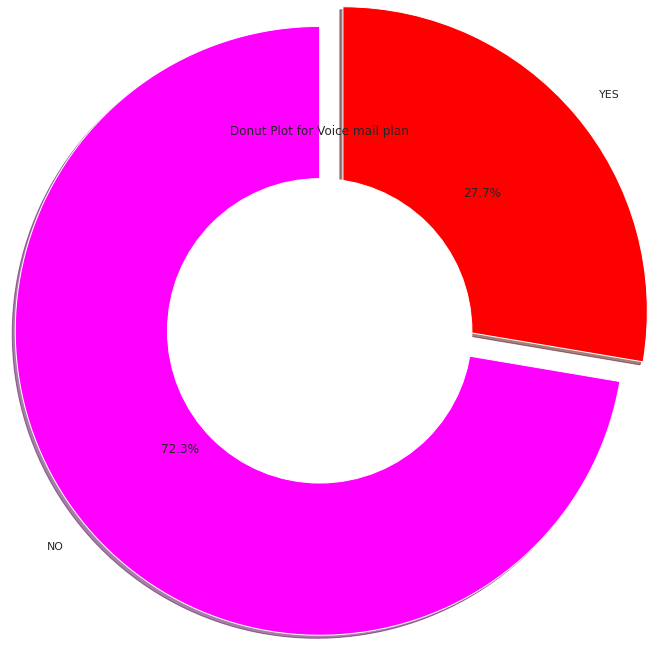

In [50]:
#To get the Donut Plot to analyze Voice mail plan
data = df['Voice mail plan'].value_counts()
explode = (0, 0.2)
plt.pie(data, explode = explode,autopct='%1.1f%%',startangle=90,shadow=True,radius = 2.0, labels = ['NO','YES'],colors=['magenta','red'])
circle = plt.Circle( (0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Donut Plot for Voice mail plan')
plt.show()

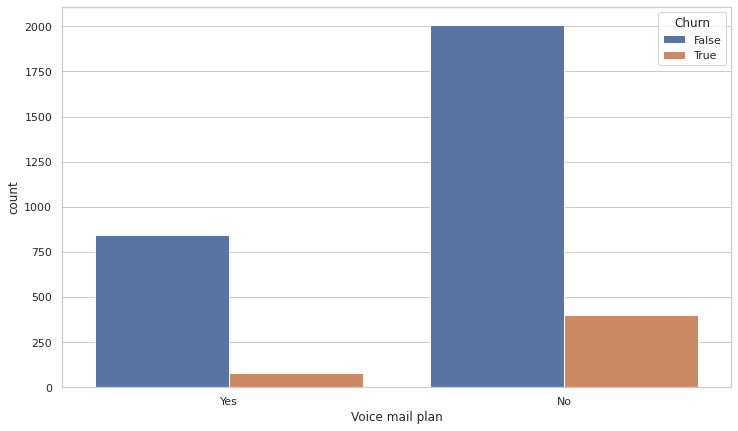

In [51]:
#Analysing by using countplot
sns.countplot(x='Voice mail plan',hue="Churn",data = df)

#### Findings 

* In this data there is no relaion between "Customer churn" and "Voice mail plan" and so voice mail ploan having no role that customer leaving the operator.

## Analysis of Number vmail Messages 

In [52]:
# Find the unique values in Voice Mail Meassages
df['Number vmail messages'].unique()


array([25, 26,  0, 24, 37, 27, 33, 39, 30, 41, 28, 34, 46, 29, 35, 21, 32,
       42, 36, 22, 23, 43, 31, 38, 40, 48, 18, 17, 45, 16, 20, 14, 19, 51,
       15, 11, 12, 47,  8, 44, 49,  4, 10, 13, 50,  9])

In [ ]:
# Find the number of unique values in Voice Mail Meassages
df['Number vmail messages'].nunique()

46

In [53]:
# Calculate the percentage of Number vmail messages and churn
Number_vmail_messages_data = pd.crosstab(df["Number vmail messages"],df["Churn"])
Number_vmail_messages_data['Percentage Churn'] = Number_vmail_messages_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(Number_vmail_messages_data)

Churn                  False  True  Percentage Churn
Number vmail messages                               
0                       2008   403         16.715056
4                          1     0          0.000000
8                          2     0          0.000000
9                          2     0          0.000000
10                         1     0          0.000000
11                         2     0          0.000000
12                         6     0          0.000000
13                         4     0          0.000000
14                         7     0          0.000000
15                         8     1         11.111111
16                        12     1          7.692308
17                        13     1          7.142857
18                         5     2         28.571429
19                        18     1          5.263158
20                        20     2          9.090909
21                        26     2          7.142857
22                        30     2          6.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


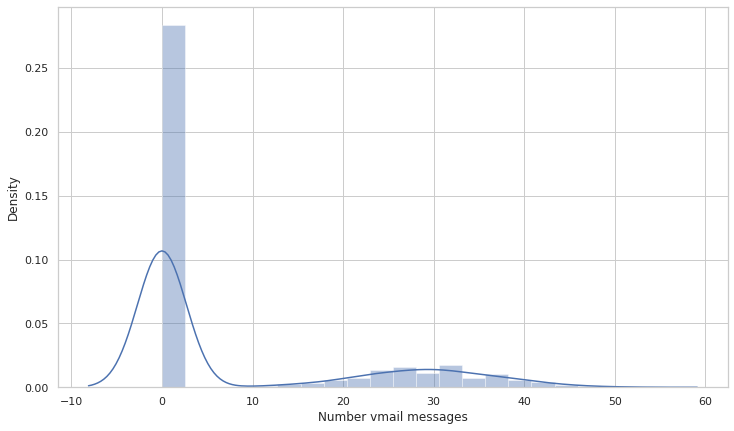

In [54]:
# Showing the Number vmail messages on graph using distplot
sns.distplot(df['Number vmail messages'])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


<Figure size 720x576 with 0 Axes>

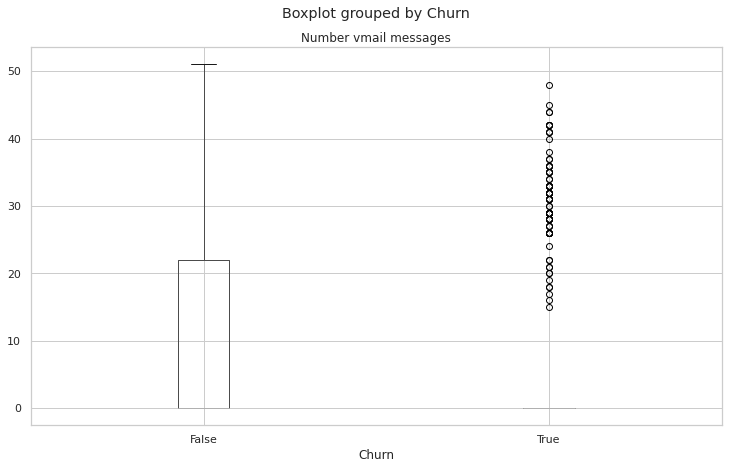

In [55]:
#Analysing by using boxplot diagram between 'number vmail messages' and 'churn'
fig = plt.figure(figsize =(10, 8)) 
df.boxplot(column='Number vmail messages', by='Churn')
fig.suptitle('Number vmail message', fontsize=14, fontweight='bold')
plt.show()

#### Findings

* After analyzing the above voice mail feature data we get an insight that when there are more than 20 voice-mail messages then there is a churn.

## Analysis of Customer Service Calls

In [56]:
# Finding the Data of Customer service calls
df['Customer service calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: Customer service calls, dtype: int64

In [57]:
# Calculate the percentage and compare the values of "Customer Service Calls" and "Churn"
Customer_service_calls_data = pd.crosstab(df['Customer service calls'],df["Churn"])
Customer_service_calls_data['Percentage_Churn'] = Customer_service_calls_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(Customer_service_calls_data)

Churn                   False  True  Percentage_Churn
Customer service calls                               
0                         605    92         13.199426
1                        1059   122         10.330229
2                         672    87         11.462451
3                         385    44         10.256410
4                          90    76         45.783133
5                          26    40         60.606061
6                           8    14         63.636364
7                           4     5         55.555556
8                           1     1         50.000000
9                           0     2        100.000000


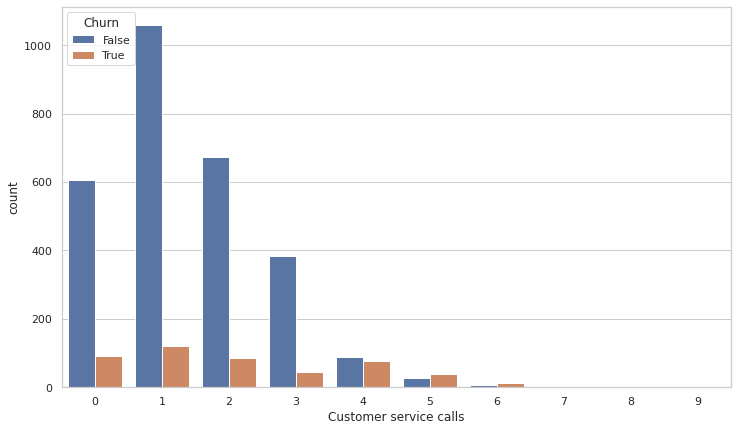

In [58]:
# Plot the values on the graph
sns.countplot(x='Customer service calls',hue="Churn",data = df)

#### Findings 

1. It is observed from the above analysis that, mostly because of bad customer service, people tend to leave the operator.
2. The above data indicating that those customers who called the service center 5 times or above those customer churn percentage is higher than 60%

## Analysing the different call Charges


In [59]:
#Deriving a relation between overall call charge and overall call minutes   
day_charge_perm = df['Total day charge'].mean()/df['Total day minutes'].mean()
eve_charge_perm = df['Total eve charge'].mean()/df['Total eve minutes'].mean()
night_charge_perm = df['Total night charge'].mean()/df['Total night minutes'].mean()
int_charge_perm= df['Total intl charge'].mean()/df['Total intl minutes'].mean()

In [62]:
print([day_charge_perm,eve_charge_perm,night_charge_perm,int_charge_perm])

[0.17000300739130672, 0.08500104871485778, 0.04500041448440008, 0.2700500279887107]


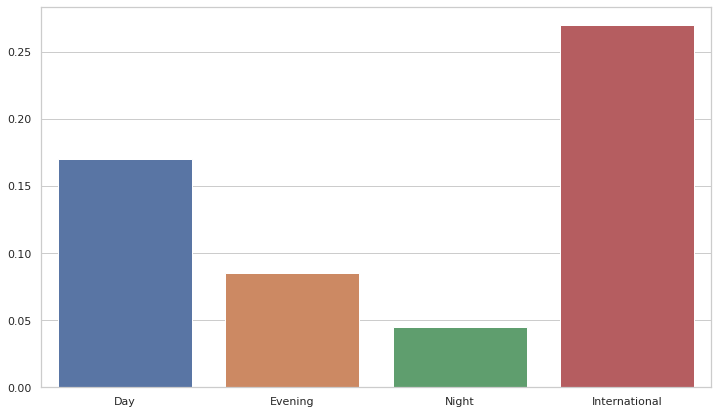

In [63]:
# Presentation of different call Charges 

sns.barplot(x=['Day','Evening','Night','International'],y=[day_charge_perm,eve_charge_perm,night_charge_perm,int_charge_perm])

## Conclusion

After exploratory data analysis on the given data set, there are some reasons or findings are: 

1.	After analyzing the data few states churn rate is high may be due to poor network coverage.
2.	Account length and Area code does not play an important role in customer churning
3.	International Plan play an important role in customer churning because customer is not satisfied from their plans and their charges also looking high
4.	Quality of voice mail messages also have an impact on customer churning maximum voice mail messages high chances of customer churn.
5.	Total Day calls/Minutes/ Charges, Total eve calls/Minutes/charges, Total night calls/Minutes/charges having not any important kind of relationship in customer churning.
6.	Increase customer service calls also increase the chances of customer churning that shows the customer complaints are high and it does not resolve on time which increase the customer dissatisfaction.


##### **Recommendation**

1. Improve the network coverage 
2.	Provide some discounts on international plans 
3.	Improvise the voice mail quality 
4.	Quality of customer service should be improving and resolve the issue on time 
5. Take feedback form customers on sevral intervals 
